This is a train according to this source: 

(https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/1-Fundamentals.ipynb)

this is also a good source: (https://perso.esiee.fr/~perretb/I5FM/TAI/)

In [9]:
import cv2 as cv
import numpy as np # matrix manipulations

-----------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
#the following are to do with this interactive notebook code
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks 
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (4.0, 2.0) # this controls figure size in the notebook

-----------------------------------------------------------------------------------------------------------------------------------------------------

Now we can open an image:

In [11]:
input_image=cv.imread('img/noidea.jpg')

-----------------------------------------------------------------------------------------------------------------------------------------------------

input_image is now RGB format. If we show it now, the colors are reversed(reds are violet and blues and violets are yellow)

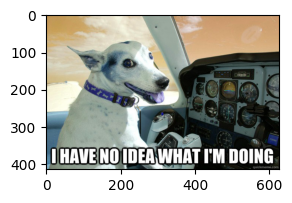

In [12]:
plt.imshow(input_image)

-----------------------------------------------------------------------------------------------------------------------------------------------------

**For the image to be in correct colors (because OpenCV reads images in BGR instead of RGB) , we have to mirror the colors using cvtColor function.**

***What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.***


In [13]:
img_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

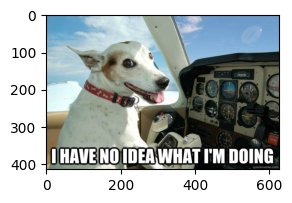

In [14]:
# Show using matplotlib
plt.imshow(img_rgb)
# plt.axis('off')  # optional, remove axes

In [15]:
print(input_image.size)
print(input_image.shape)
print(input_image.dtype)
print(img_rgb.size)
print(img_rgb.shape)
print(img_rgb.dtype)

776250
(414, 625, 3)
uint8
776250
(414, 625, 3)
uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and 
inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.


**Now we try to split color channels**

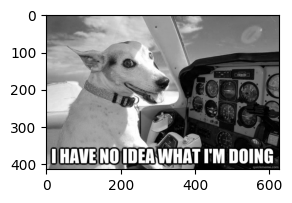

In [16]:
# split channels
b, g, r = cv.split(input_image)
# show one of the channels ==> this is red - see that the sky is kind of dark.
plt.imshow(r, cmap="gray")


Try changing it to b(blue)

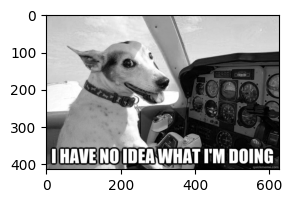

In [17]:
plt.imshow(b,cmap="gray") # see! the sky now is lighter

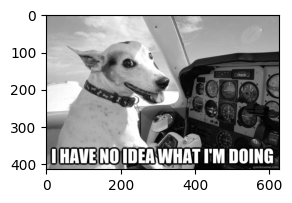

In [18]:
plt.imshow(g,cmap="gray")

-----------------------------------------------------------------------------------------------------------------------------------------------------

## Converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

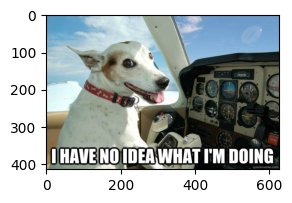

In [19]:
merged = cv.merge([r, g, b])
# merge takes an array of single channel matrices
plt.imshow(merged)

So instead of using cvtColor:
```img_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)```

We try extracted red,green and blue and then merged them with cv.merge([r,g,b]) in the order RGB and not BGR. 
```
b, g, r = cv.split(input_image)
merged = cv.merge([r,g,b])
```

-----------------------------------------------------------------------------------------------------------------------------------------------------

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done.

In [20]:
colorFlags=[flag for flag in dir(cv) if flag.startswith("COLOR")]
print(colorFlags)
print(len(colorFlags))

['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_DEEPGREEN', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_

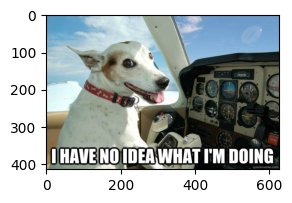

In [21]:
opencv_merged=cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

----------------------------------------------------------------------------------------------------------------------------------------------------

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [22]:
pixel=input_image[100,100]
print(pixel)

[150 161 153]


In [23]:
input_image[100,100]=[0,0,0]
newPixel= input_image[100,100]
print(newPixel)

[0 0 0]


----------------------------------------------------------------------------------------------------------------------------------------------------

## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

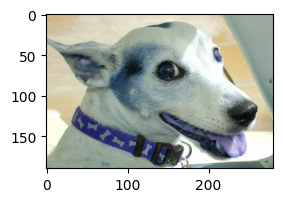

In [24]:
dogFace=input_image[60:250,70:350]
plt.imshow(dogFace)

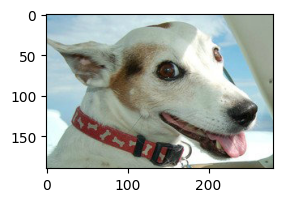

In [25]:
dogFace=img_rgb[60:250,70:350]
plt.imshow(dogFace)

190
280


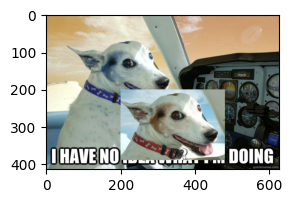

In [26]:
# it's either start with a fresh read of the image,
# or end up with dogfaces on dogfaces on dogfaces
# as you re-run parts of the notebook but not others...
input_image[200:200+dogFace.shape[0],200:200+dogFace.shape[1]]=dogFace
print(dogFace.shape[0])
print(dogFace.shape[1])
plt.imshow(input_image)
# Now you see that we can put other photos on top of others. 

----------------------------------------------------------------------------------------------------------------------------------------------------

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there. 

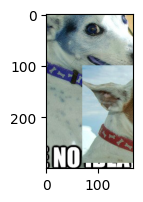

In [27]:
crop = input_image[100:400, 130:300] 
plt.imshow(crop)

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

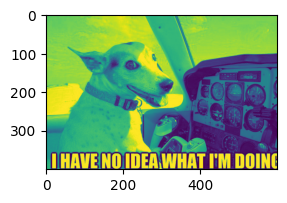

In [29]:
new_image = cv.imread("img/noidea.jpg")
new_image_rgb = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
plt.imshow(new_image_rgb)

# convert image to HSV
hsvim = cv.cvtColor(new_image_rgb, cv.COLOR_BGR2HSV)
bcrop = hsvim[0:400, 0:600, 2]  # 0 = Blue and 1 = Green and 2 = Red
plt.imshow(bcrop)